[실습]
아래 식을 만족하는 데이터 셋을 생성하고, 학습하는 모델 만들기

$y = \frac{2}{1+e^{-(2x+1)}} + 1$

아래와 같이 풀어 쓸 수 있음

$x$ ----> input

$x_1 = 2x + 1$    ----> Dense layer

$x_2 = \frac{1}{1+e^{-x_1}}$   ----> Activation function: sigmoid

$y = 2x_2 + 1$    ----> Dense layer

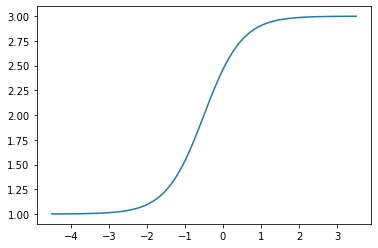

In [16]:
%matplotlib inline

import keras
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 / (1 + np.exp(-(2*x + 1))) + 1

# f(x) 함수 확인
x = np.linspace(-0.5-4, -0.5+4, num=100)
plt.plot(x, f(x))
plt.show()

In [17]:
x_train = np.random.rand(1024,1)*10-5
y_train = f(x_train)

x_test = np.linspace(-0.5-2, -0.5+2, num=5).reshape((-1,1))
y_test = f(x_test)
print(x_test)
print(y_test)

[[-2.5]
 [-1.5]
 [-0.5]
 [ 0.5]
 [ 1.5]]
[[1.03597242]
 [1.23840584]
 [2.        ]
 [2.76159416]
 [2.96402758]]


In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, name='d1', input_dim=1))
model.add(keras.layers.Activation('sigmoid', name='sigmoid'))
model.add(keras.layers.Dense(1, name='d2'))

model.summary()
sgd = keras.optimizers.SGD(lr=0.05)
model.compile(sgd, 'mse')
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1 (Dense)                   (None, 1)                 2         
_________________________________________________________________
sigmoid (Activation)         (None, 1)                 0         
_________________________________________________________________
d2 (Dense)                   (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Train on 819 samples, validate on 205 samples
Epoch 1/100
819/819 [==============================] - 0s 204us/step - loss: 1.7015 - val_loss: 0.5422
Epoch 2/100
819/819 [==============================] - 0s 52us/step - loss: 0.4476 - val_loss: 0.3055
Epoch 3/100
819/819 [==============================] - 0s 49us/step - loss: 0.2425 - val_loss: 0.1659
Epoch 4/100
819/819 [==============================] - 0s 4

819/819 [==============================] - 0s 45us/step - loss: 3.2917e-04 - val_loss: 3.9031e-04
Epoch 72/100
819/819 [==============================] - 0s 45us/step - loss: 3.1635e-04 - val_loss: 3.7666e-04
Epoch 73/100
819/819 [==============================] - 0s 49us/step - loss: 3.0402e-04 - val_loss: 3.6349e-04
Epoch 74/100
819/819 [==============================] - 0s 45us/step - loss: 2.9309e-04 - val_loss: 3.4953e-04
Epoch 75/100
819/819 [==============================] - 0s 47us/step - loss: 2.8163e-04 - val_loss: 3.3505e-04
Epoch 76/100
819/819 [==============================] - 0s 46us/step - loss: 2.7121e-04 - val_loss: 3.2441e-04
Epoch 77/100
819/819 [==============================] - 0s 46us/step - loss: 2.6140e-04 - val_loss: 3.1044e-04
Epoch 78/100
819/819 [==============================] - 0s 45us/step - loss: 2.5141e-04 - val_loss: 3.0054e-04
Epoch 79/100
819/819 [==============================] - 0s 47us/step - loss: 2.4185e-04 - val_loss: 2.8949e-04
Epoch 80/100
8

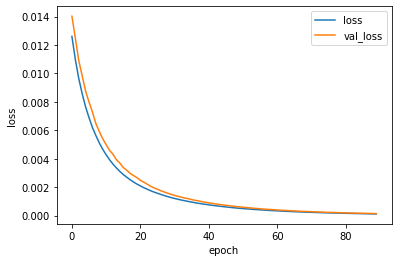

In [19]:
plt.plot(hist.history['loss'][10:], label='loss')
plt.plot(hist.history['val_loss'][10:], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc=0)

In [20]:
y_pred = model.predict(x_test)
print('y_pred'); print(y_pred)
print('y_test'); print(y_test)

y_pred
[[1.0379249]
 [1.2542344]
 [1.992003 ]
 [2.7392926]
 [2.9620643]]
y_test
[[1.03597242]
 [1.23840584]
 [2.        ]
 [2.76159416]
 [2.96402758]]


In [21]:
d1_weights = model.get_layer('d1').get_weights()
d2_weights = model.get_layer('d2').get_weights()

print('d1_weights'); print(d1_weights)
print('d2_weights'); print(d2_weights)

d1_weights
[array([[1.8891925]], dtype=float32), array([0.92720526], dtype=float32)]
d2_weights
[array([[2.0141807]], dtype=float32), array([0.99366957], dtype=float32)]
